In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/NgoluaStanley/Employee_Salary_Prediction/main/Baltimore_salaries.csv")
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [3]:
#A brief description of the DataFrame,including details on the data types, non-null values,and memory utilization,is given by 
#the info() method.
data.info()
#There are 18981 rows in the data setand there are 7 columns in the data set provided,all the columns are of type Object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [4]:
#To find a Pandas DataFrame's dimensions, use the df.shape attribute.The number of rows and columns in the DataFrame is returned
#as a tuple. Df.shape in our instance shows that our DataFrame has 15 columns and 32,561 rows.
data.shape

(18981, 7)

In [5]:
# To find the number of non-null (non-missing) values in each column of a DataFrame,df.count() method is used.
# It gives back a Series with the counts for every column.
data.count()

 Name           18981
JobTitle        18981
AgencyID        18981
Agency          18981
HireDate        18911
AnnualSalary    18981
GrossPay        15758
dtype: int64

In [6]:
# A overview of the statistical measures for each numerical column in the DataFrame is given by the df.describe() method.
# It comprises the following: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), mean, 
# standard deviation, and count.
data.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [7]:
#Cleaning up column names is a good idea to ensure uniformity and prevent any problems during data manipulation and analysis.
# This line replaces any spaces in the column names with an empty string by using the str.replace() method.
# Spaces are practically eliminated from the column names.
#Removing spaces from column names.
data.columns = data.columns.str.replace(' ', '') 
#Replacing hypens with  underscore.
data.columns = data.columns.str.replace('-', '_') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [8]:
#The df.isnull().sum() expression is used to count the number of missing values (null or NaN) in each column of a Pandas
#DataFrame. It returns a Series containing the count of missing values for each column.
data.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [9]:
#HireDate has 70 null values, or less than 1% of all values,therefore removing those rows.
data.dropna(subset=['HireDate'])

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [10]:
#HireDate has 3223 null values, or less than 5% of all values,therefore removing those rows.
data.dropna(subset=['GrossPay'])

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18974,"Zoppo,Catherine B",REAL ESTATE AGENT I,A15001,COMP-Real Estate,03/14/1977,$58313.00,$58359.66
18975,"Zorbach,Michael K",POLICE OFFICER,A99224,Police Department,05/02/2012,$44104.00,$48915.33
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [11]:
#The df.isnull().sum() expression is used to count the number of missing values (null or NaN) in each column of a Pandas
#DataFrame. It returns a Series containing the count of missing values for each column.
data.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [12]:
#Determing Value_counts for AgencyID
data.AgencyID.value_counts()
# In Blatimore, there are 1177 agencies.We should have the same number of Agencies since, in general,
# AgencyID represents an Agency.

AgencyID
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: count, Length: 1177, dtype: int64

In [13]:
#Determining Value_counts for Agency
data.Agency.value_counts()
#Against general expectations,A single Agency seems to have different Agency ID's which might be given
#based on Job Role and Agency.

Agency
Youth Summer                4323
Police Department           3211
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: count, Length: 65, dtype: int64

In [14]:
#Determining Value_counts for JobTitle
data.JobTitle.value_counts()
#There are 1073 Job title that are available.

JobTitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: count, Length: 1075, dtype: int64

In [15]:
#Determining Value counts on HireDate
data.HireDate.value_counts()
#On May 21, 2014, a greater number of individuals are chosen,The date format is MM/DD/YYYY.

HireDate
05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: count, Length: 4737, dtype: int64

In [16]:
#Determining Value counts on Annual Salary
data.AnnualSalary.value_counts()

AnnualSalary
$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$116300.00       1
$83500.00        1
$40994.00        1
$42846.00        1
$900.00          1
Name: count, Length: 1590, dtype: int64

In [17]:
#The dollar symbol "Annual Salary" has to be removed in order to convert it to an integer format.
# Removing $ from Annual Salary and converting it into Integer format
data['AnnualSalary'] = data['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [18]:
#Determining Value counts on Annual Salary
data.AnnualSalary.value_counts()

AnnualSalary
11310.0     4811
20800.0      325
29245.0      196
43999.0      169
44773.0      163
            ... 
116300.0       1
83500.0        1
40994.0        1
42846.0        1
900.0          1
Name: count, Length: 1590, dtype: int64

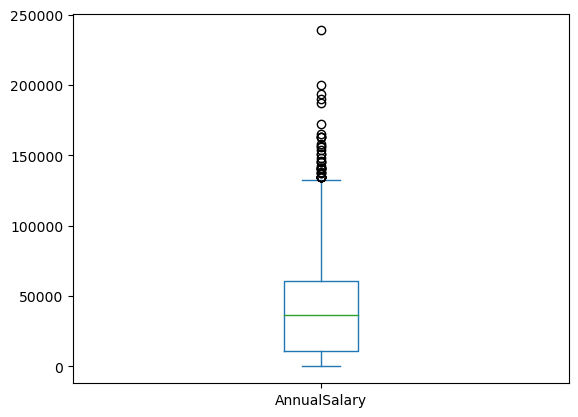

In [19]:
#Plotting the box plot of Annual Salary. 
data.AnnualSalary.plot.box()
plt.show()
# A small number of salaries are very dissimilar from one another,They might have an impact on the forecast.
# Thus, we must get rid of them.

In [20]:
# A overview of the statistical measures for each numerical column in the DataFrame is given by the df.describe() method.
# It comprises the following: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), mean, 
# standard deviation, and count.
data.AnnualSalary.describe()

count     18981.000000
mean      39756.791968
std       25173.051216
min           0.000000
25%       11310.000000
50%       36400.000000
75%       60598.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [21]:
#Let's delete rows whose annual salary> 1500000 according to box plot
salary = data[data['AnnualSalary']<150000]
salary.shape

(18965, 7)

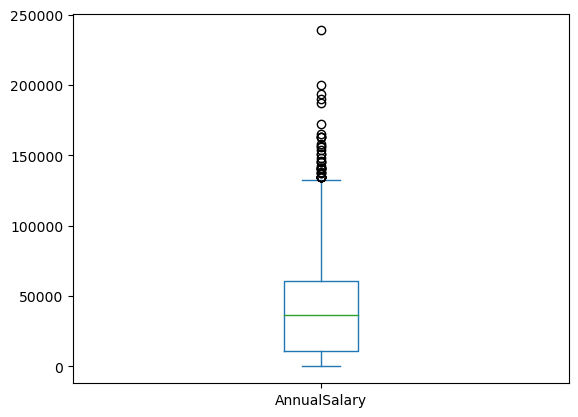

In [22]:
#Plotting the box plot of Annual Salary. 
data.AnnualSalary.plot.box()
plt.show()
# A small number of salaries are very dissimilar from one another,They might have an impact on the forecast.
# Thus, we must get rid of them.

C:\Users\vaish\AppData\Local\Temp\ipykernel_22380\1517985553.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.AnnualSalary)


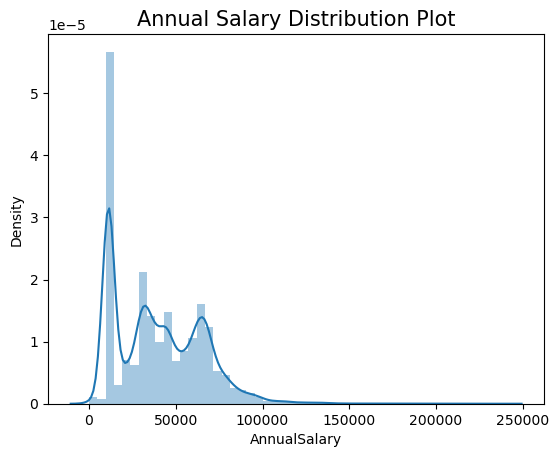

In [23]:
#Leaving it alone since all of the data points over the 75% line are quite close to one another.
#After completing the data preparation, let's move on to the following phase.
sns.distplot(data.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=15)
plt.show()
#There don't seem to be many people making above $100,000 each year, and the data is dispersed somewhat arbitrarily.

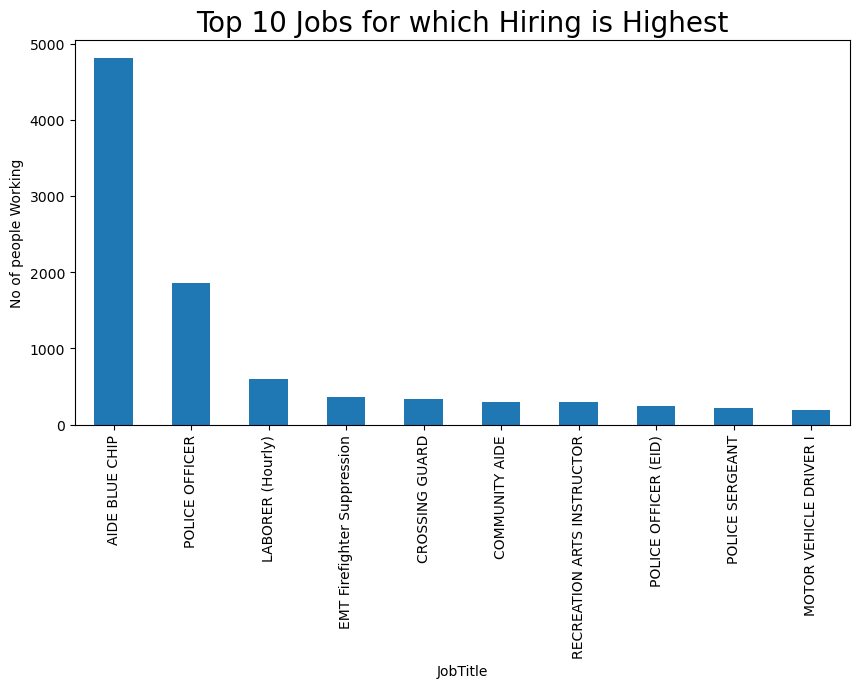

In [24]:
#Top 10 Jobs based on the hiring.
plt.figure(figsize=(10,5))
data.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

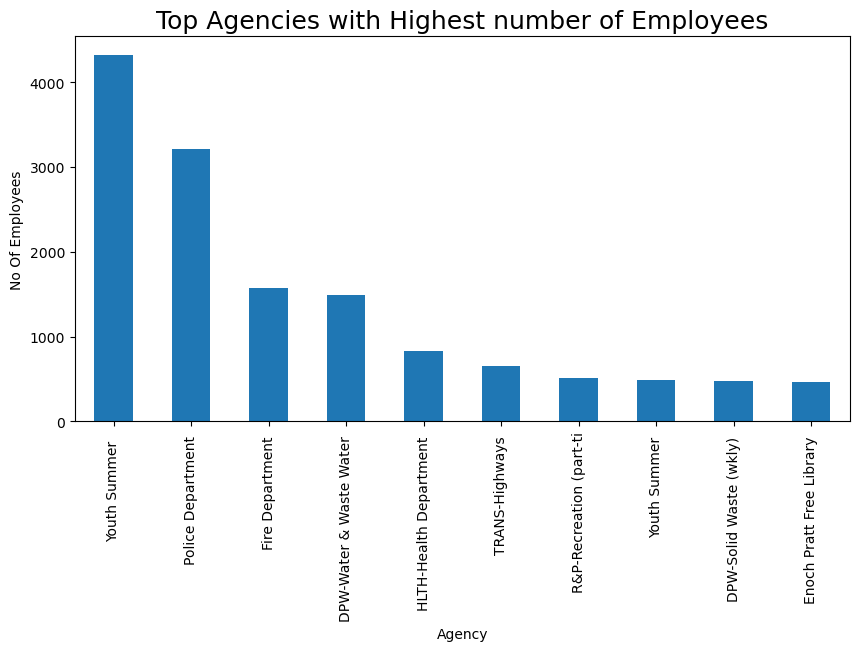

In [25]:
#Agencies with the highest number of employees.
plt.figure(figsize=(10,5))
data.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=18)
plt.show()

In [26]:
data.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [27]:
#Converting String Values into numeric Variables using Label Encoding Techniques.
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['JobTitle'] = le.fit_transform(data['JobTitle'])
data['AgencyID'] = le.fit_transform(data['AgencyID'])
data['Agency'] = le.fit_transform(data['Agency'])
data['HireDate'] = le.fit_transform(data['HireDate'])
data['AnnualSalary'] = le.fit_transform(data['AnnualSalary'])
data['GrossPay'] = le.fit_transform(data['GrossPay'])

data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,0,30,753,63,2035,22,12765
1,1,418,12,44,3887,765,7452
2,2,50,107,55,3492,1038,9904
3,3,368,317,24,2629,913,8464
4,4,748,616,47,2646,546,4844
...,...,...,...,...,...,...,...
18976,18781,30,786,63,1779,22,13732
18977,18782,30,1109,62,1779,22,13732
18978,18783,748,616,47,4593,546,1566
18979,18784,746,544,47,281,549,6592


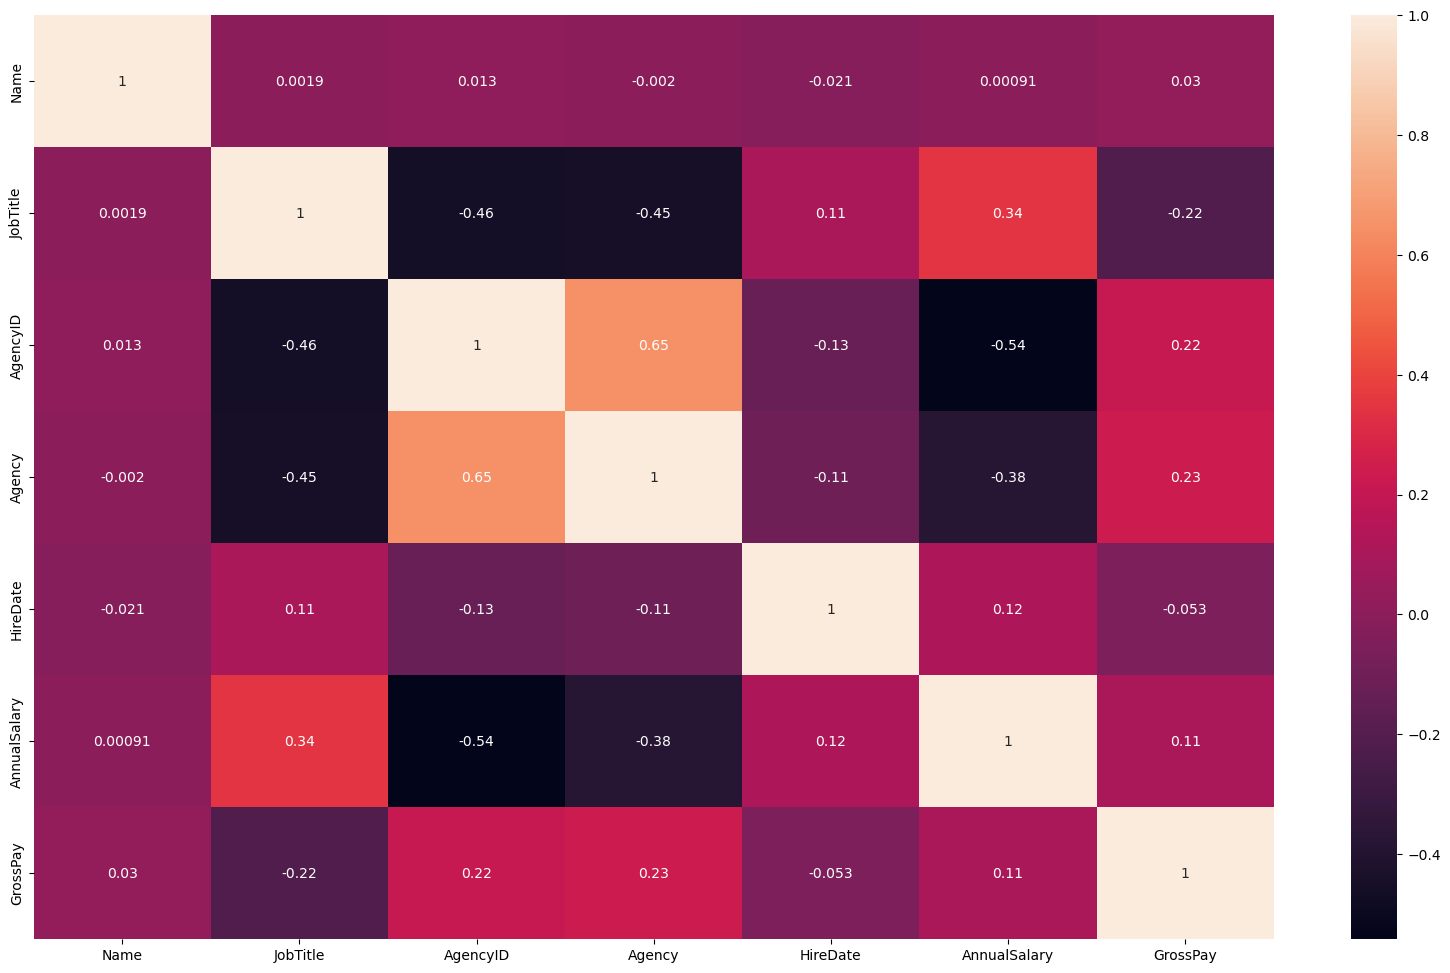

In [28]:
# Check colinearity among data columns
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

In [29]:
#Normalization (Scaling of values - MinMaxScalar)
# The process of normalization, often called scaling, is a data preprocessing procedure that puts feature values into a range. 
# One popular normalization technique is min-max scaling, which is carried out with the help of MinMaxScaler.
# In order to avoid one feature from dominating because of its higher size, all features should be brought to a similar scale.

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Convert the NumPy array back to a DataFrame with original column names and index
normalized_data = pd.DataFrame(normalized_data, columns=data.columns, index=data.index)

# Now 'normalized_data' should be normalized between 0 and 1
normalized_data.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,0.000000,0.027933,0.640306,0.984375,0.429597,0.013845,0.929581
1,0.000053,0.389199,0.010204,0.687500,0.820562,0.481435,0.542674
2,0.000106,0.046555,0.090986,0.859375,0.737175,0.653241,0.721235
3,0.000160,0.342644,0.269558,0.375000,0.554993,0.574575,0.616371
4,0.000213,0.696462,0.523810,0.734375,0.558581,0.343612,0.352753


In [30]:
# After normalization,all integer columns,count, mean, standard deviation, minimum, 25,50,75 percentile, and
# maximum are displayed.
scalar_des = data.describe()
scalar_des

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981.000000,18981.000000,18981.000000,18981.000000,18981.000000,18981.000000,18981.000000
mean,9401.459512,436.722986,500.582372,41.153100,2298.865128,475.431431,7701.330857
std,5424.638211,334.803562,307.426557,19.647595,1191.436661,445.673768,4778.973093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4704.000000,30.000000,220.000000,22.000000,1712.000000,22.000000,3326.000000
50%,9395.000000,446.000000,492.000000,47.000000,2062.000000,356.000000,7992.000000
75%,14105.000000,746.000000,688.000000,62.000000,3183.000000,889.000000,12576.000000
max,18787.000000,1074.000000,1176.000000,64.000000,4737.000000,1589.000000,13732.000000


In [31]:
#Categorising the data into train and test data:

#Including all the attributes except income that is the independent variables.
X = data.drop('AnnualSalary', axis=1)

# Including the dependent variable.
Y = data['AnnualSalary']

#Splitting the data into train and test that is 80% of data is training data and remaining 20% is testing data.
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X, Y ,test_size = 0.2, random_state=42)

In [32]:
print("\nX Training Data is\n", len(X_Train), "\n", X_Train)
print("\nX Testing Data is\n", len(X_Test), "\n", X_Test)
print("\nY Training Data is\n", len(Y_Train), "\n", Y_Train)
print("\nY Testing Data is\n", len(Y_Test), "\n", Y_Test)


X Training Data is
 15184 
         Name  JobTitle  AgencyID  Agency  HireDate  GrossPay
10794  10687       518       195      11      3645      7027
15186  15039       451       244      22      4152     10393
10097   9999       629       125       4      2672       692
9414    9318         1       146      39      2619      2585
5903    5850      1065       196      11      4721     12640
...      ...       ...       ...     ...       ...       ...
11284  11131       537       642      10       733      2811
11964  11851       119       144      39      3591      6428
5390    5341        30       865      63      2062       325
860      919       859       392       9      1101      1733
15795  15639        30      1109      62      1967     13732

[15184 rows x 6 columns]

X Testing Data is
 3797 
         Name  JobTitle  AgencyID  Agency  HireDate  GrossPay
15448  15300       377        22      44       180      1057
16204  16041       431       279      22       472     12540
906

In [33]:
#Creating a method of the model.
rf_model = RandomForestClassifier()

#Training the model using fit function.
rf_model.fit(X_Train,Y_Train)

RandomForestClassifier()

In [34]:
#Calculating Model Score.
rf_model_score=rf_model.score(X_Train,Y_Train)
print(rf_model_score)

1.0


In [35]:
#Testing the model using predict function.
rf_pred = rf_model.predict(X_Test)

#Calculating the accuracy of predicted values and actuall values.
rf_model_acc=accuracy_score(Y_Test,rf_pred)

print(rf_model_acc)

0.5322623123518567


In [37]:
#Example-2:


In [38]:
#Reading the CSV File values in the URL directly into a pandas DataFrame.
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
df = pd.read_csv('https://raw.githubusercontent.com/kb22/Income-Predictor/master/income-dataset.csv', names = columns)

In [39]:
#Checking for missing values.
df.isnull().sum()

Age                 0
Work Class          0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per Week      0
Country             0
Income              0
dtype: int64

In [40]:
# To find the number of non-null (non-missing) values in each column of a DataFrame,df.count() method is used.
# It gives back a Series with the counts for every column.
df.count()

Age                 32561
Work Class          32561
Final Weight        32561
Education           32561
Education Number    32561
Marital Status      32561
Occupation          32561
Relationship        32561
Race                32561
Sex                 32561
Capital Gain        32561
Capital Loss        32561
Hours per Week      32561
Country             32561
Income              32561
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<Axes: xlabel='Age', ylabel='count'>

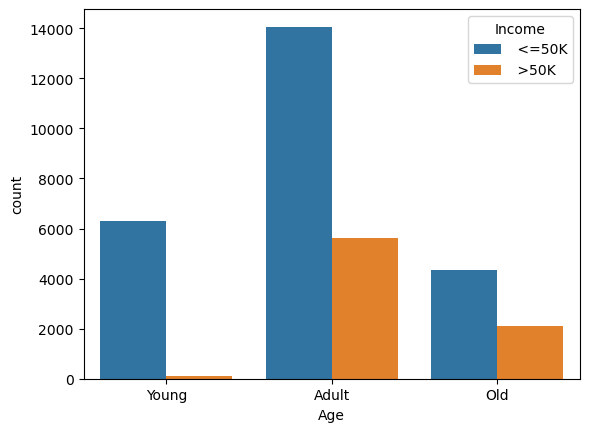

In [46]:
sns.countplot(x = 'Age', hue = 'Income', data = df)

In [47]:
#Encoding Data Values.
y = df['Income']
X = df.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 110


In [48]:
#Splitting the values into test and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [49]:
#Creating a method of the model.
rf_model = RandomForestClassifier()

#Training the model using fit function.
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
#Calculating Model Score.
rf_model_score=rf_model.score(X_train,y_train)
print(rf_model_score)

0.9998683748683749


In [51]:
#Testing the model using predict function.
rf_pred = rf_model.predict(X_test)

#Calculating the accuracy of predicted values and actuall values.
rf_model_acc=accuracy_score(y_test,rf_pred)

print(rf_model_acc)

0.8431773978912888


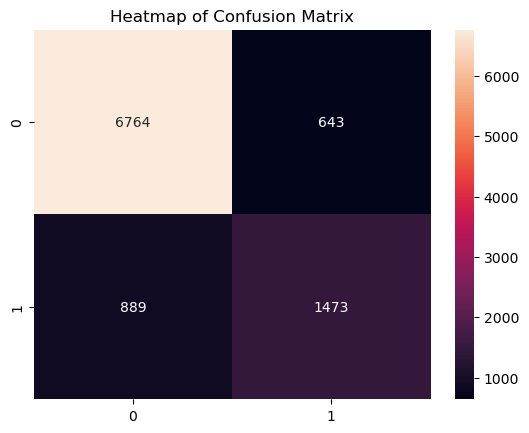

In [52]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(y_test,rf_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [53]:
#Hyperparameter Training.
params = dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

#Using Random Search CV training the model again with the hyper parameters.
best_rf_model = RandomizedSearchCV(rf_model,params,random_state=7)

#Testing the model using predict function.
best_rf_model.fit(X_train,y_train)

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vaish\anaconda3\Lib\site-packages\

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

In [54]:
#Finding the best parameters in the model.
best_rf_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [55]:
#Defining the model with best parameters.
best_model_rf = RandomForestClassifier(min_samples_split= 5, max_depth= 10, criterion= 'entropy')

In [56]:
#Training the model with best hyper parameters.
best_model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [57]:
#Testing the model using predict function.
best_rf_pred = best_model_rf.predict(X_test)

#Calculating the accuracy of predicted values and actuall values.
rf_best_model_acc=accuracy_score(y_test,best_rf_pred)
print(rf_best_model_acc)

0.8534138601699253


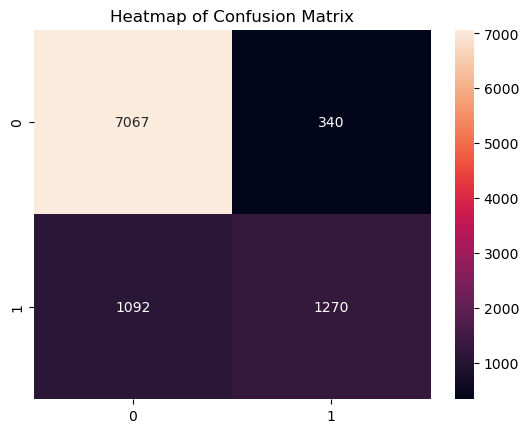

In [58]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(y_test,best_rf_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [ ]:
References:
1.https://www.kaggle.com/code/dilaraahan/adult-census-income-analyze-and-visualization
2.https://www.kaggle.com/code/shivamkc3/approaching-machine-learning-problems
3.https://builtin.com/data-science/step-step-explanation-principal-component-analysis
4.https://www.ibm.com/topics/logistic-regression